In [29]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
%qtconsole

In [2]:
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import logging
logging.basicConfig(level=logging.INFO)

In [3]:
epoch_key = ('HPa', 6, 2)

In [4]:
from src.parameters import (ANIMALS, SAMPLING_FREQUENCY,
                            REPLAY_COVARIATES)

In [5]:
from src.data_processing import (get_interpolated_position_dataframe,
                                 get_LFP_dataframe,
                                 get_mark_indicator_dataframe,
                                 get_spike_indicator_dataframe,
                                 make_neuron_dataframe,
                                 make_tetrode_dataframe, reshape_to_segments,
                                 save_xarray)

In [6]:
tetrode_info = make_tetrode_dataframe(ANIMALS).xs(epoch_key, drop_level=False)
tetrode_info

animal  area  day    depth descrip  epoch  \
animal day epoch tetrode_number                                             
HPa    6   2     1                 HPa   CA1    6  [[114]]  riptet      2   
                 2                 HPa   CA1    6  [[121]]     NaN      2   
                 3                 HPa   CA1    6   [[90]]  CA1Ref      2   
                 4                 HPa   CA1    6  [[117]]  riptet      2   
                 5                 HPa   CA1    6  [[117]]  riptet      2   
                 6                 HPa   CA1    6  [[110]]  riptet      2   
                 7                 HPa   CA1    6  [[114]]  riptet      2   
                 8                 HPa  iCA1    6  [[114]]  riptet      2   
                 9                 HPa  iCA1    6  [[101]]  riptet      2   
                 10                HPa  iCA1    6   [[98]]     NaN      2   
                 11                HPa  iCA1    6  [[108]]  riptet      2   
                 12                HPa  iCA1    6  [[116]]  riptet      2   
                 13                HPa  iCA1    6  [[120]]     NaN      2   
                 14                HPa  iCA1    6  [[105]]  riptet      2   
                 15                HPa   PFC    6  [[120]]     NaN      2   
                 16                HPa   PFC    6  [[123]]     NaN      2   
                 17                HPa   PFC    6  [[123]]     NaN      2   
                 18                HPa   PFC    6  [[112]]     NaN      2   
                 19                HPa   PFC    6  [[130]]     NaN      2   
                 20                HPa   PFC    6  [[109]]     NaN      2   

                                hemisphere  maxcell  nearCA2  numcells  \
animal day epoch tetrode_number                                          
HPa    6   2     1                     NaN      NaN      NaN       7.0   
                 2                     NaN      NaN      NaN       0.0   
                 3                     NaN      NaN      NaN       0.0   
                 4                     NaN      NaN      NaN       8.0   
                 5                     NaN      NaN      NaN       5.0   
                 6                     NaN      NaN      NaN       0.0   
                 7                     NaN      NaN      NaN       0.0   
                 8                     NaN      NaN      NaN       1.0   
                 9                     NaN      NaN      NaN       1.0   
                 10                    NaN      NaN      NaN       1.0   
                 11                    NaN      NaN      NaN       1.0   
                 12                    NaN      NaN      NaN       1.0   
                 13                    NaN      NaN      NaN       0.0   
                 14                    NaN      NaN      NaN       1.0   
                 15                    NaN      NaN      NaN       0.0   
                 16                    NaN      NaN      NaN       0.0   
                 17                    NaN      NaN      NaN       1.0   
                 18                    NaN      NaN      NaN       1.0   
                 19                    NaN      NaN      NaN       0.0   
                 20                    NaN      NaN      NaN       0.0   

                                 representative subarea     tetrode_id  \
animal day epoch tetrode_number                                          
HPa    6   2     1                          NaN     NaN  HPa_06_02_001   
                 2                          NaN     NaN  HPa_06_02_002   
                 3                          NaN     NaN  HPa_06_02_003   
                 4                          NaN     NaN  HPa_06_02_004   
                 5                          NaN     NaN  HPa_06_02_005   
                 6                          NaN     NaN  HPa_06_02_006   
                 7                          NaN     NaN  HPa_06_02_007   
                 8                        

In [7]:
from src.ripple_detection import Kay_ripple_detector

is_hippocampal = (tetrode_info.area.isin(['CA1', 'iCA1', 'CA3']) &
                  (tetrode_info.descrip.isin(['riptet']) |
                   tetrode_info.validripple))
tetrode_keys = tetrode_info[is_hippocampal].index.tolist()
hippocampus_lfps = pd.concat(
    [get_LFP_dataframe(tetrode_key, ANIMALS)
     for tetrode_key in tetrode_keys], axis=1)
speed = get_interpolated_position_dataframe(
    epoch_key, ANIMALS).speed.values
time = hippocampus_lfps.index.values
ripple_times = Kay_ripple_detector(
    time, hippocampus_lfps.values, speed, SAMPLING_FREQUENCY)

In [8]:
ripple_times

start_time     end_time
ripple_number                          
1              4137.813333  4137.874667
2              4139.667333  4139.732667
3              4142.945333  4142.986667
4              4168.426667  4168.463333
5              4194.944667  4194.971333
6              4197.592667  4197.628000
7              4251.480667  4251.528667
8              4252.046667  4252.097333
9              4253.733333  4253.770000
10             4254.509333  4254.572000
11             4269.154000  4269.198000
12             4314.591333  4314.650000
13             4316.934667  4317.016667
14             4327.313333  4327.380667
15             4345.514000  4345.586667
16             4346.239333  4346.277333
17             4367.317333  4367.412667
18             4367.621333  4367.780000
19             4367.818000  4367.857333
20             4368.954667  4369.010667
21             4388.341333  4388.381333
22             4388.407333  4388.452000
23             4419.759333  4419.797333
24             4457.043333  4457.076000
25             4479.598000  4479.669333
26             4484.097333  4484.146000
27             4496.276000  4496.323333
28             4515.952667  4516.002667
29             4525.852667  4525.914667
30             4526.099333  4526.150000
...                    ...          ...
184            5224.728667  5224.858667
185            5235.494667  5235.560000
186            5240.340000  5240.382000
187            5244.702000  5244.748667
188            5246.628667  5246.709333
189            5251.779333  5251.823333
190            5253.774000  5253.819333
191            5254.805333  5254.871333
192            5256.604000  5256.636000
193            5257.902667  5257.937333
194            5257.944667  5257.979333
195            5260.022000  5260.070667
196            5260.095333  5260.157333
197            5266.406667  5266.459333
198            5267.024667  5267.082667
199            5268.364667  5268.408000
200            5270.160000  5270.231333
201            5271.684667  5271.742667
202            5291.292667  5291.352000
203            5295.763333  5295.826000
204            5304.329333  5304.366667
205            5305.818000  5305.878000
206            5306.184667  5306.230667
207            5314.106667  5314.157333
208            5316.729333  5316.793333
209            5316.968000  5317.050000
210            5326.095333  5326.141333
211            5326.305333  5326.387333
212            5326.584667  5326.652000
213            5326.936667  5326.974667

[213 rows x 2 columns]

In [9]:
position_info = get_interpolated_position_dataframe(epoch_key, ANIMALS)

In [10]:
from src.data_processing import make_neuron_dataframe
neuron_info = make_neuron_dataframe(ANIMALS).xs(epoch_key, drop_level=False).query('numspikes > 0')

In [11]:
neuron_info

animal  area       csi  day  \
animal day epoch tetrode_number neuron_number                               
HPa    6   2     1              1                HPa   CA1  0.004049    6   
                                2                HPa   CA1  0.117225    6   
                                3                HPa   CA1  0.042945    6   
                                4                HPa   CA1  0.104167    6   
                                5                HPa   CA1  0.091950    6   
                                6                HPa   CA1  0.093514    6   
                 4              1                HPa   CA1  0.206349    6   
                                2                HPa   CA1  0.088235    6   
                                3                HPa   CA1  0.023166    6   
                                4                HPa   CA1  0.151860    6   
                                5                HPa   CA1  0.154930    6   
                                6                HPa   CA1  0.047794    6   
                 5              1                HPa   CA1  0.267584    6   
                                2                HPa   CA1  0.097618    6   
                                4                HPa   CA1  0.195122    6   
                                5                HPa   CA1  0.069979    6   
                 8              1                HPa  iCA1  0.048257    6   
                 9              1                HPa  iCA1  0.087662    6   
                 10             1                HPa  iCA1  0.067797    6   
                 11             1                HPa  iCA1  0.139106    6   
                 12             1                HPa  iCA1  0.032258    6   
                 14             1                HPa  iCA1  0.087108    6   
                 17             1                HPa   PFC  0.205399    6   
                 18             1                HPa   PFC  0.006277    6   

                                               epoch hemisphere   meanrate  \
animal day epoch tetrode_number neuron_number                                
HPa    6   2     1              1                  2        NaN   0.409959   
                                2                  2        NaN   0.346888   
                                3                  2        NaN   0.405809   
                                4                  2        NaN   0.159336   
                                5                  2        NaN   2.247303   
                                6                  2        NaN   0.550207   
                 4              1                  2        NaN   0.156846   
                                2                  2        NaN   0.112863   
                                3                  2        NaN   0.214938   
                                4                  2        NaN   1.092946   
                                5                  2        NaN   0.235685   
                                6                  2        NaN   0.451452   
                 5              1                  2        NaN   0.542739   
                                2                  2        NaN   2.473859   
                                4                  2        NaN   0.544398   
                                5                  2        NaN   2.004149   
                 8              1                  2        NaN   0.309544   
                 9              1                  2        NaN   0.511203   
                 10             1                  2        NaN   0.293776   
                 11             1                  2        NaN   1.169295   
                 12             1                  2        NaN   0.308714   
                 14             1                  2        NaN   0.238174   
                 17             1                  2        NaN  56.261411   
                 18             1                  2        NaN   1.321992   

              

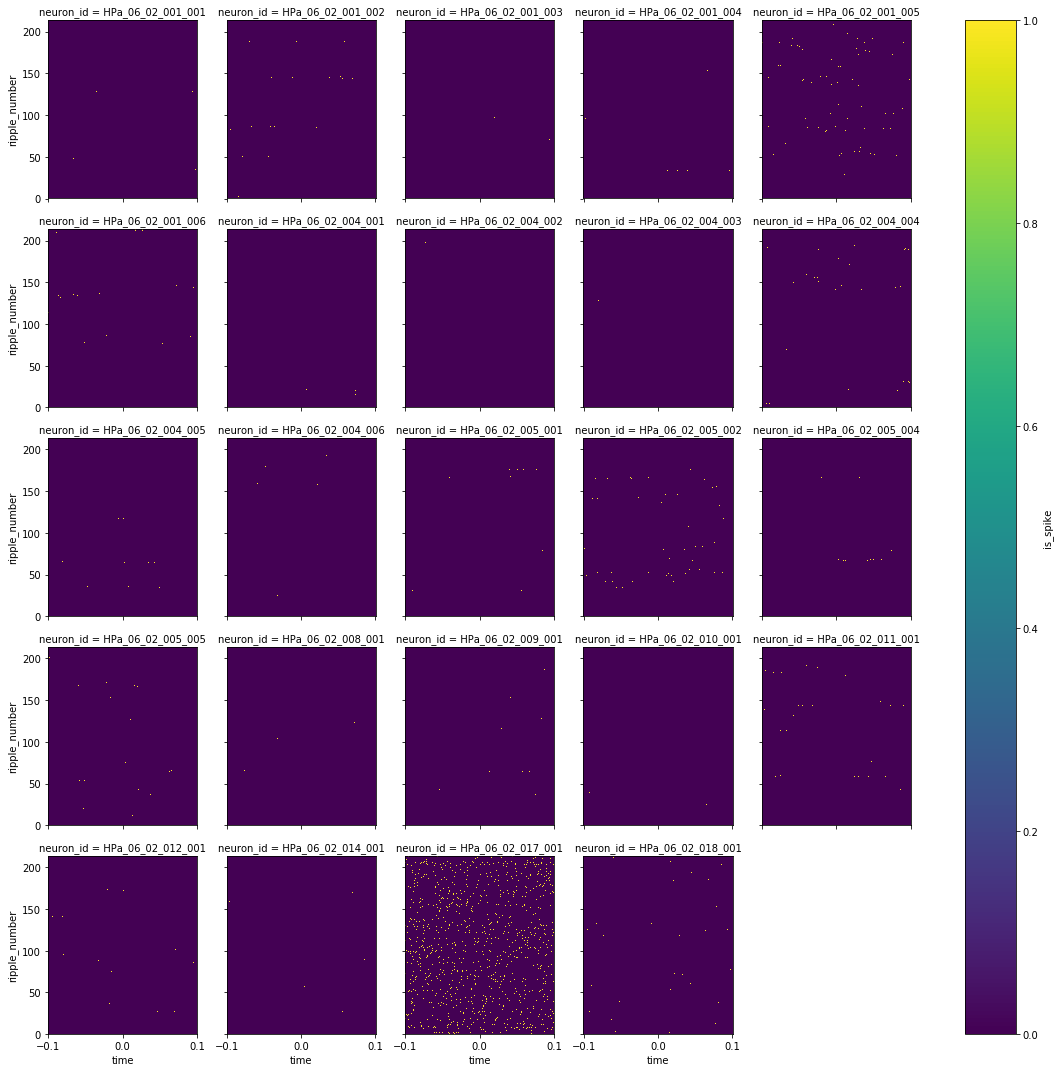

In [56]:
from src.data_processing import get_spike_indicator_dataframe

ripple_locked_neurons = xr.concat(
    [reshape_to_segments(
         get_spike_indicator_dataframe(neuron_key, ANIMALS),
         ripple_times.loc[:, ('start_time', 'end_time')].values,
    window_offset=(-.100, .100), segment_name='ripple_number').to_xarray()
     for neuron_key in neuron_info.index],
    dim=neuron_info.neuron_id)

ripple_locked_neurons.is_spike.plot(x='time', y='ripple_number', col='neuron_id', col_wrap=5);

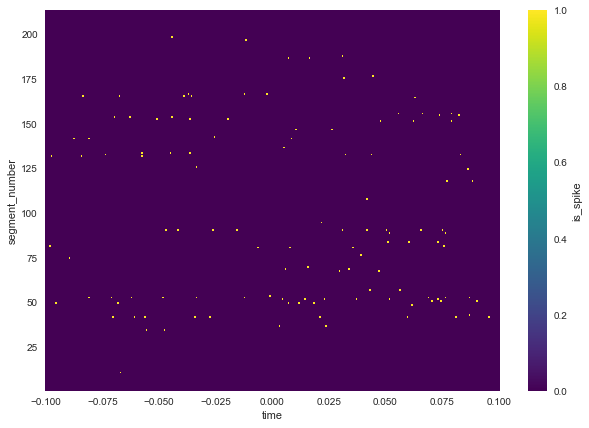

In [14]:
neuron_key = ('HPa', 6, 2, 5, 2)
spikes = get_spike_indicator_dataframe(neuron_key, ANIMALS)
ripple_locked_spikes = reshape_to_segments(
             spikes,
             ripple_times.loc[:, ('start_time', 'end_time')].values, window_offset=(-0.100, 0.100))
ripple_locked_spikes.to_xarray().is_spike.plot(x='time', y='segment_number', size=7);

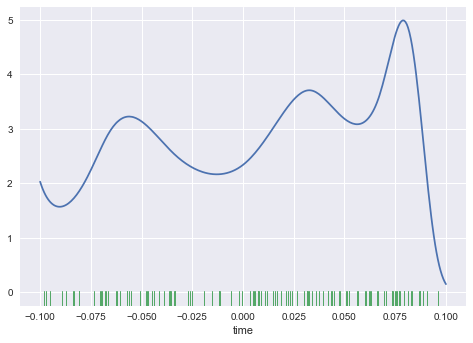

In [565]:
from patsy import build_design_matrices, dmatrix
from statsmodels.api import GLM, families

formula = '1 + bs(time, df=8, degree=3)'
design_matrix = dmatrix(
    formula, ripple_locked_spikes.is_spike.reset_index(), return_type='dataframe')

fitted_model = sm.GLM(ripple_locked_spikes.is_spike.values, design_matrix, family=families.Poisson()).fit()
predict_design_matrix = build_design_matrices([design_matrix.design_info], dict(time=time))[0]
plt.plot(time, fitted_model.predict(predict_design_matrix) * SAMPLING_FREQUENCY);
sns.distplot(ripple_locked_spikes.loc[ripple_locked_spikes.is_spike == 1].reset_index().time,
             hist=False, rug=True, kde=False);

In [ ]:
from src.analysis import ripple_cross_correlation
ripple_cross_correlation(ripple_times.values, neuron_info, ANIMALS,
                            SAMPLING_FREQUENCY, window_offset=(-0.1, 0.1))

In [ ]:
from src.analysis import ripple_locked_firing_rate_change
ripple_locked_firing_rate_change(ripple_times.values, neuron_info.loc[neuron_info.numspikes > 0], ANIMALS,
                            SAMPLING_FREQUENCY, window_offset=(-0.1, 0.1))

In [139]:
from src.analysis import decode_ripple_clusterless

neuron_key = ('HPa', 6, 2, 5, 2)
spikes = get_spike_indicator_dataframe(neuron_key, ANIMALS)
ripple_locked_spikes = reshape_to_segments(
    spikes, ripple_times.loc[:, ('start_time', 'end_time')].values,
    window_offset=(-0.100, 0.100), segment_name='ripple_number')

replay_info, state_probability, posterior_density = (
        decode_ripple_clusterless(epoch_key, ANIMALS, ripple_times))

data = pd.merge(ripple_locked_spikes.reset_index(),
                replay_info.reset_index(), on='ripple_number')
data

INFO:src.analysis:Decoding ripples
INFO:src.ripple_decoding.decoders:Fitting state transition model...
INFO:src.ripple_decoding.decoders:Fitting observation model...
INFO:src.analysis:Predicting replay types


ripple_number    time  is_spike   start_time     end_time animal  day  \
0                  1 -0.1000         0  4137.813333  4137.874667    HPa    6   
1                  1 -0.0993         0  4137.813333  4137.874667    HPa    6   
2                  1 -0.0987         0  4137.813333  4137.874667    HPa    6   
3                  1 -0.0980         0  4137.813333  4137.874667    HPa    6   
4                  1 -0.0973         0  4137.813333  4137.874667    HPa    6   
5                  1 -0.0967         0  4137.813333  4137.874667    HPa    6   
6                  1 -0.0960         0  4137.813333  4137.874667    HPa    6   
7                  1 -0.0953         0  4137.813333  4137.874667    HPa    6   
8                  1 -0.0947         0  4137.813333  4137.874667    HPa    6   
9                  1 -0.0940         0  4137.813333  4137.874667    HPa    6   
10                 1 -0.0933         0  4137.813333  4137.874667    HPa    6   
11                 1 -0.0927         0  4137.813333  4137.874667    HPa    6   
12                 1 -0.0920         0  4137.813333  4137.874667    HPa    6   
13                 1 -0.0913         0  4137.813333  4137.874667    HPa    6   
14                 1 -0.0907         0  4137.813333  4137.874667    HPa    6   
15                 1 -0.0900         0  4137.813333  4137.874667    HPa    6   
16                 1 -0.0893         0  4137.813333  4137.874667    HPa    6   
17                 1 -0.0887         0  4137.813333  4137.874667    HPa    6   
18                 1 -0.0880         0  4137.813333  4137.874667    HPa    6   
19                 1 -0.0873         0  4137.813333  4137.874667    HPa    6   
20                 1 -0.0867         0  4137.813333  4137.874667    HPa    6   
21                 1 -0.0860         0  4137.813333  4137.874667    HPa    6   
22                 1 -0.0853         0  4137.813333  4137.874667    HPa    6   
23                 1 -0.0847         0  4137.813333  4137.874667    HPa    6   
24                 1 -0.0840         0  4137.813333  4137.874667    HPa    6   
25                 1 -0.0833         0  4137.813333  4137.874667    HPa    6   
26                 1 -0.0827         0  4137.813333  4137.874667    HPa    6   
27                 1 -0.0820         0  4137.813333  4137.874667    HPa    6   
28                 1 -0.0813         0  4137.813333  4137.874667    HPa    6   
29                 1 -0.0807         0  4137.813333  4137.874667    HPa    6   
...              ...     ...       ...          ...          ...    ...  ...   
64083            213  0.0807         0  5326.936667  5326.974667    HPa    6   
64084            213  0.0813         0  5326.936667  5326.974667    HPa    6   
64085            213  0.0820         0  5326.936667  5326.974667    HPa    6   
64086            213  0.0827         0  5326.936667  5326.974667    HPa    6   
64087            213  0.0833         0  5326.936667  5326.974667    HPa    6   
64088            213  0.0840         0  5326.936667  5326.974667    HPa    6   
64089            213  0.0847         0  5326.936667  5326.974667    HPa    6   
64090            213  0.0853         0  5326.936667  5326.974667    HPa    6   
64091            213  0.0860         0  5326.936667  5326.974667    HPa    6   
64092            213  0.0867         0  5326.936667  5326.974667    HPa    6   
64093            213  0.0873         0  5326.936667  5326.974667    HPa    6   
64094            213  0.0880         0  5326.936667  5326.974667    HPa    6   
64095            213  0.0887         0  5326.936667  5326.974667    HPa    6   
64096            213  0.0893         0  5326.936667  5326.974667    HPa    6   
64097            213  0.0900         0  5326.936667  5326.974667    HPa    6   
64098            213  0.0907         0  5326.936667  5326.974667    HPa    6   
64099            213  0.0913         0  5326.936667  5326.974667    HPa    6   
64100            213  0.0920         0  5326.936667  5326.974667    HPa    6   
64101  

In [107]:
from patsy import dmatrices, build_design_matrices

response, design_matrix = dmatrices('is_spike ~ session_time', data)
fit = GLM(response, design_matrix, family=families.Poisson()).fit()

In [108]:
response, design_matrix = dmatrices('is_spike ~ replay_task + replay_order', data)
fit = GLM(response, design_matrix, family=families.Poisson()).fit()

In [114]:
response, design_matrix = dmatrices('is_spike ~ session_time * bs(time, df=5)', data)
fit = GLM(response, design_matrix, family=families.Poisson()).fit()

In [ ]:
response, design_matrix = dmatrices('is_spike ~ replay_task * bs(time, df=5) + replay_order * bs(time, df=5)', data)
fit = GLM(response, design_matrix, family=families.Poisson()).fit()

In [198]:
import pandas as pd

def lag(x, n):
    try:
        return pd.concat([x.shift(lag) for lag in np.arange(n) + 1], axis=1)
    except AttributeError:
        return pd.concat([pd.Series(x).shift(lag) for lag in np.arange(n) + 1], axis=1).values


In [151]:
from patsy import dmatrices, build_design_matrices

In [207]:
response, design_matrix = dmatrices('is_spike ~ lag(is_spike, 2)', data, return_type='dataframe')


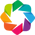

:HoloMap   [neuron_id]
   :Image   [time,ripple_number]   (is_spike)

In [62]:
%%opts Image [width=400 height=400]

import holoviews as hv
hv.extension('bokeh', 'matplotlib')
ds = hv.Dataset(ripple_locked_neurons)
ds.to(hv.Image, ['time', 'ripple_number'])

### Check cross correlation
Make sure NaNs in cross correlation make sense

In [65]:
from src.analysis import ripple_cross_correlation

ripple_xcorr = ripple_cross_correlation(
    ripple_times.values, neuron_info, ANIMALS,
    SAMPLING_FREQUENCY, window_offset=(-0.100, 0.100))

ripple_xcorr

/Users/edeno/Documents/GitHub/Jadhav-2016-Data-Analysis/src/spike_train.py:148: RuntimeWarning: Mean of empty slice
  correlation = np.nanmean(correlation / correlation.max(axis=0), axis=1)


<xarray.DataArray 'correlation' (time: 2, delay: 301, neuron1: 24, neuron2: 24)>
array([[[[  0., ...,  nan],
         ..., 
         [ nan, ...,   0.]],

        ..., 
        [[  0., ...,  nan],
         ..., 
         [ nan, ...,   0.]]],


       [[[  0., ...,  nan],
         ..., 
         [ nan, ...,   0.]],

        ..., 
        [[  0., ...,  nan],
         ..., 
         [ nan, ...,   0.]]]])
Coordinates:
  * delay    (delay) float64 -0.1 -0.09933 -0.09867 -0.098 -0.09733 -0.09667 ...
  * neuron1  (neuron1) object 'HPa_06_02_001_001' 'HPa_06_02_001_002' ...
  * neuron2  (neuron2) object 'HPa_06_02_001_001' 'HPa_06_02_001_002' ...
  * time     (time) float64 -0.1 0.0

Make sure there are some non-NaNs

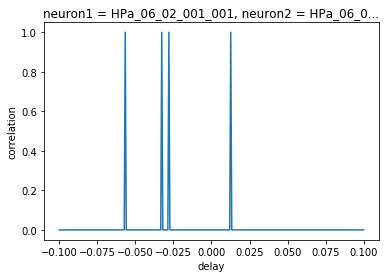

In [74]:
ripple_xcorr.isel(neuron1=0, neuron2=1, time=0).plot();

Now find a cross-correlation with all NaNs

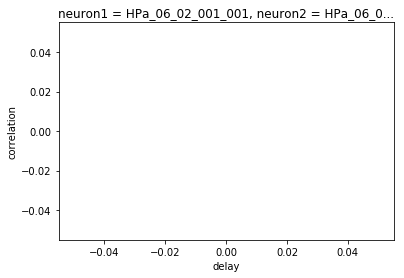

In [75]:
ripple_xcorr.isel(neuron1=0, neuron2=2, time=0).plot();

Check this pair over all trials

In [83]:
from src.spike_train import cross_correlate

before_ripple = []

for neuron_key in neuron_info.iloc[[0, 2]].index:
    spikes = get_spike_indicator_dataframe(neuron_key, ANIMALS)
    ripple_locked_spikes = reshape_to_segments(
        spikes, ripple_times.values, sampling_frequency=SAMPLING_FREQUENCY,
        window_offset=(-.100, .100)).unstack(level=0)
    before_ripple.append(ripple_locked_spikes.loc[:0].values)


In [97]:
from scipy.signal import correlate

spike_train1, spike_train2 = before_ripple
correlation = np.array(
    [correlate(spike_train1_by_trial, spike_train2_by_trial)
     for spike_train1_by_trial, spike_train2_by_trial
     in zip(spike_train1.T, spike_train2.T)]).T
correlation.sum()

0

Check if there are any trials that share spikes. There are none....

In [95]:
spike_train1.sum(axis=1) * spike_train2.sum(axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

array([[ nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan],
       ..., 
       [  0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.]])

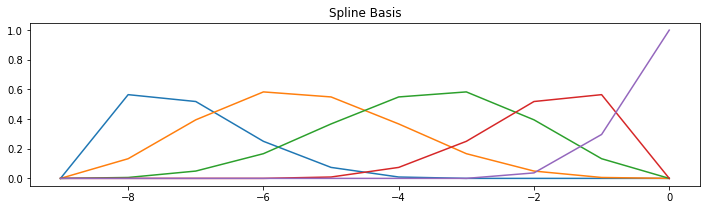

In [141]:
from patsy import dmatrices, build_design_matrices, dmatrix
formula='bs(time, df=5) - 1'

t = -np.arange(0, 10)
design_matrix = dmatrix(formula, dict(time=t),
                        return_type='dataframe')
predict_design_matrix = build_design_matrices(
        [design_matrix.design_info], dict(time=np.unique(t)))[0]

fig, axes = plt.subplots(1, 1, figsize=(12, 3), sharey=True)

for data in predict_design_matrix.T:
    axes.plot(np.unique(t), data)
    
axes.set_title('Spline Basis');
np.dot(lag(ripple_locked_spikes.is_spike, 10), design_matrix)

In [201]:
from patsy import dmatrices, build_design_matrices, dmatrix
formula='is_spike ~ np.dot(lag(is_spike, 100), bs(time, df=5))'
t = -np.arange(0, 100)
response, design_matrix = dmatrices(formula, dict(time=t, is_spike=ripple_locked_spikes.is_spike),
                        return_type='dataframe')
fit = GLM(response, design_matrix, family=families.Poisson()).fit()

In [202]:
predict_design_matrix = build_design_matrices(
        [design_matrix.design_info],
    dict(time=t, is_spike=np.eye(100)[0]))[0]

In [118]:
neuron_key = ('HPa', 6, 2, 5, 2)
spikes = get_spike_indicator_dataframe(neuron_key, ANIMALS)
ripple_locked_spikes = reshape_to_segments(
    spikes, ripple_times.loc[:, ('start_time', 'end_time')].values,
    window_offset=(-0.100, 0.100), segment_name='ripple_number')


In [212]:
from patsy import dmatrices, build_design_matrices, dmatrix
formula='is_spike ~ lag(is_spike, 100) * bs(time, df=5)'
t = -np.arange(0, 100)
response, design_matrix = dmatrices(formula, dict(time=t, is_spike=ripple_locked_spikes.is_spike),
                        return_type='dataframe')
fit = GLM(response, design_matrix, family=families.Poisson()).fit()

PatsyError: Number of rows mismatch between is_spike and bs(time, df=5) (64113 versus 100)
    is_spike ~ lag(is_spike, 100) * bs(time, df=5)
                                    ^^^^^^^^^^^^^^